<a href="https://colab.research.google.com/github/te6-in/ENGL437/blob/main/sound_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)
- 사인 곡선 generator

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 200.0     # sine frequency, Hz
phase = 0  # phase, radian

In [3]:
# generate sample ticks
nSamp = sr * dur # sample의 개수 (10000*0.5 = 5000)
samples = np.arange(1, nSamp+1) # [1, 2, 3, ..., 4999, 5000]

In [4]:
# convert sample to time (sec)
t = samples/sr # ticks [1/10000, 2/10000, 3/10000, ..., 4999/10000, 5000/10000(0.5초)]

In [6]:
# convert time to angle (radian)
theta0 = t * 2*np.pi * freq # 0 ~ 6.28 정도 (0.5 * 2*pi * 200)

In [8]:
# shift angle by phase
theta = theta0 + phase

In [9]:
# generate signal by sin-phasor
s = amp * np.sin(theta) # sin 곡선의 y values (x values === tick이나 theta(radian) 정도가 되겠네요)

Text(0, 0.5, 'real')

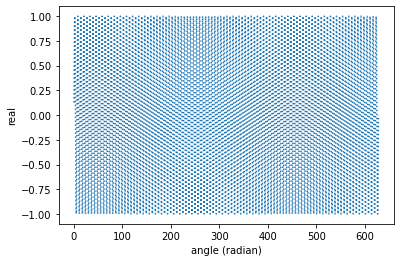

In [11]:
# plot the entire signal
plt.plot(theta, s, ':') # (x값, y값, 기호)
plt.xlabel('angle (radian)')
plt.ylabel('real')

Text(0, 0.5, 'real')

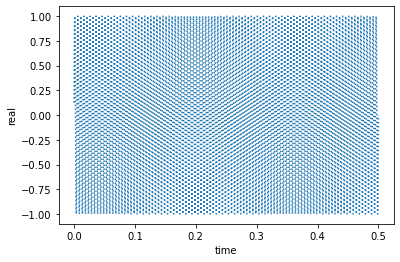

In [13]:
# plot the entire signal
plt.plot(t, s, ':') # (x값, y값, 기호)
plt.xlabel('time (second)')
plt.ylabel('real')

Text(0, 0.5, 'real')

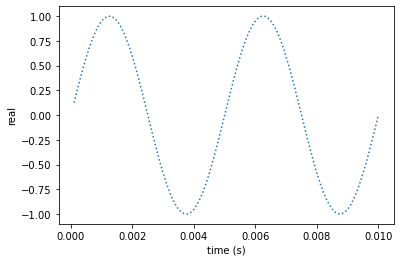

In [14]:
# plot a certain portion of signals
# 그래프 앞부분 100개 뽑기 (그래프를 좌우로 확대했다고 보자)
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [15]:
ipd.Audio(s, rate=sr)

#### 과제: 여기 밑에 두 개 이해하고 오기 (제출 X)

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 110; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [ ]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert samples to time
t = samples/sr

In [ ]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

In [ ]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain portion of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c, rate=sr)

In [ ]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.real, rate=sr)